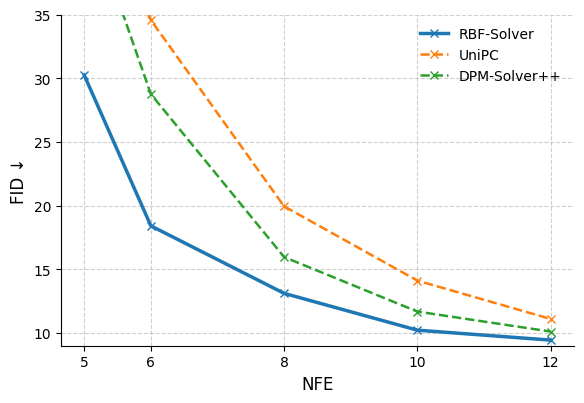

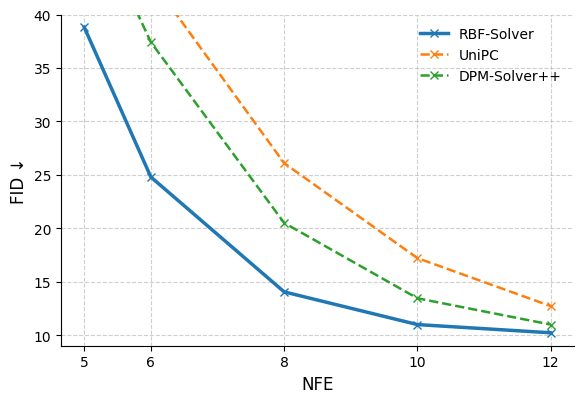

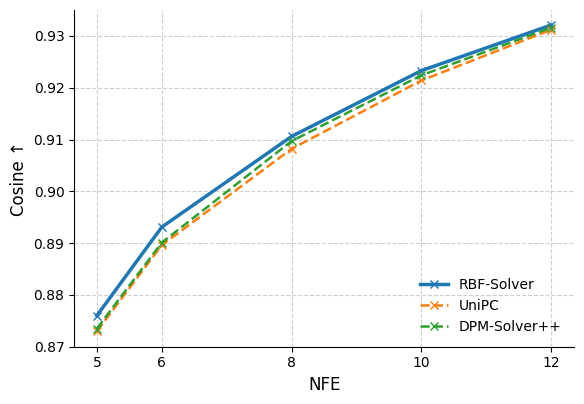

In [16]:
import matplotlib.pyplot as plt

# ─────────────────── 공통 설정 ───────────────────
plt.rcParams.update({
    "font.size":        12,
    "axes.labelsize":   12,
    "xtick.labelsize":  10,
    "ytick.labelsize":  10,
    "legend.fontsize":  10,
    "axes.grid":        True,
    "grid.linestyle":   "--",
    "grid.alpha":       0.6,
    "axes.spines.top":  False,
    "axes.spines.right":False,
})

nfe_common = [5, 6, 8, 10, 12]   # 모든 그래프에서 동일하게 사용

# ───────── 데이터 ─────────
datasets = {
    "ImageNet128": {
        "ylim":  (9, 35),
        "ylabel":"FID ↓",
        "scores": {
            "RBF-Solver":   [30.24, 18.41, 13.11, 10.22,  9.44],
            "UniPC":        [50.63, 34.56, 19.94, 14.11, 11.10],
            "DPM-Solver++": [43.76, 28.75, 15.96, 11.68, 10.11],
        },
    },
    "ImageNet256": {
        "ylim":  (9, 40),
        "ylabel":"FID ↓",
        "scores": {
            "RBF-Solver":   [38.81, 24.79, 14.04, 10.98, 10.21],
            "UniPC":        [55.80, 43.31, 26.09, 17.20, 12.71],
            "DPM-Solver++": [50.80, 37.41, 20.50, 13.44, 10.98],
        },
    },
    "SD14_CLIP": {
        "ylim":  (0.87, 0.935),
        "ylabel":"Cosine ↑",
        "scores": {
            "RBF-Solver":   [0.8760, 0.8931, 0.9106, 0.9233, 0.9321],
            "UniPC":        [0.8730, 0.8896, 0.9082, 0.9214, 0.9312],
            "DPM-Solver++": [0.8735, 0.8901, 0.9097, 0.9224, 0.9316],
        },
    },
}

# ───────── 그래프 개별 출력 ─────────
for name, cfg in datasets.items():
    plt.figure(figsize=(6, 4.2))
    for model, vals in cfg["scores"].items():
        lw = 2.5 if "RBF" in model else 1.8
        ls = "-"  if "RBF" in model else "--"
        plt.plot(nfe_common, vals, marker="x", linewidth=lw, linestyle=ls, label=model)

    plt.xlabel("NFE")
    plt.ylabel(cfg["ylabel"])
    plt.xticks(nfe_common)
    plt.ylim(cfg["ylim"])

    # ── 범례 위치 조건 분기 ─────────────────────────────
    loc = "lower right" if name == "SD14_CLIP" else "upper right"
    plt.legend(frameon=False, loc=loc)
    # ─────────────────────────────────────────────────

    plt.tight_layout()
    plt.show()